In [36]:
import tensorflow as tf
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


In [37]:
import imageio

In [38]:
import random

In [69]:
def save_image(path, image):
    image = np.array(image)
    imageio.imwrite(path,image)

In [40]:
tf.compat.v1.disable_eager_execution()

In [75]:
A=Image.open('elon.jpg')

In [76]:
A=np.array(A)

In [77]:
A = np.reshape(A, ((1,) + A.shape))

In [78]:
B1 = np.array([
 [ [[1,1,1],[1,1,1],[1,1,1]], [[1,0,1],[1,0,1],[1,0,1]] ,[[1,-1,1],[1,-1,1],[1,-1,1]] ],
 [ [[0,1,0],[0,1,0],[0,1,0]], [[0,0,0],[0,0,0],[0,0,0]] ,[[0,-1,0],[0,-1,0],[0,-1,0]] ],
 [ [[-1,1,-1],[-1,1,-1],[-1,1,-1]], [[-1,0,-1],[-1,0,-1],[-1,0,-1]] ,[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]] ],])

In [79]:
B2 = np.array([
 [ [[1,1,1],[1,1,1],[1,1,1]], [[1,1,1],[1,1,1],[1,1,1]] ,[[1,1,1],[1,1,1],[1,1,1]] ],
 [ [[0,0,0],[0,0,0],[0,0,0]], [[0,0,0],[0,0,0],[0,0,0]] ,[[0,0,0],[0,0,0],[0,0,0]] ],
 [ [[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]], [[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]] ,[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]] ],])

In [87]:
A=A/255

In [88]:
A_=tf.constant(A,dtype=tf.float32)

In [89]:
B_=tf.constant(B1,dtype=tf.float32)

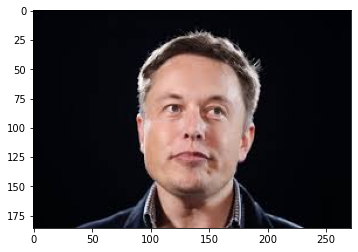

In [90]:
plt.imshow(A[0])

In [91]:
t1=tf.nn.conv2d(A_, B_, strides=[1, 1, 1, 1], padding='SAME')

In [92]:
with tf.compat.v1.Session() as sess:
    C=sess.run(t1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


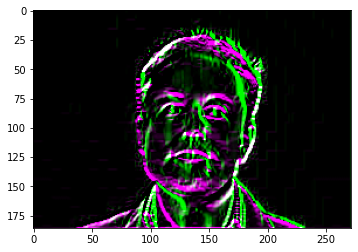

In [93]:
plt.imshow(C[0])

In [94]:
t2=tf.nn.avg_pool(t1, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')

In [95]:
with tf.compat.v1.Session() as sess:
    C=sess.run(t2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


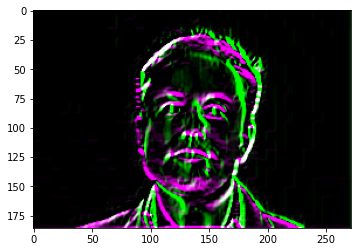

In [96]:
plt.imshow(C[0])

In [97]:
C.shape

(1, 186, 272, 3)

In [110]:
D=C[0]

In [111]:
S=Image.open('d11.jpg')
S=S.resize((D.shape[1],D.shape[0]))

In [112]:
S=np.array(S)/255

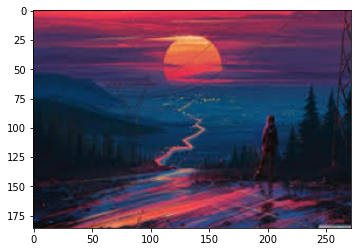

In [113]:
plt.imshow(S)

In [114]:
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        if(D[i][j][0]<0.5 and D[i][j][1]<0.5 and D[i][j][2]<0.5):
            D[i][j]=S[i][j]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


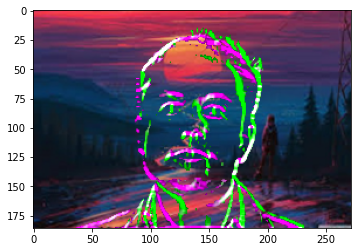

In [115]:
plt.imshow(D)